# Name: Yash Meshram
# Roll No.: 18110192
# Assignment 6 & 7

# Secret code: DEV

# Task 1

In [1]:
import math
# import numpy as np

def deg(theta):
    rad = (math.pi/180)*theta
    return rad

def cos(q):
    return math.cos(deg(q))

def sin(q):
    return math.sin(deg(q))

# def acos(a):
#     return math.acos(a)*180/math.pi

# def atan(a):
#     return math.atan(a)*180/math.pi

In [2]:
import sympy
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

A = [40, 6, 10]
B = [40, 1, 10]
l1 = 60
l2 = 60
h = 10

(x1, y1, z1) = (A[0], A[1], A[2])
(x2, y2, z2) = (B[0], B[1], B[2])

# Taking SCARA Robot
# Here, x and z are constants
z = 10
x = 40
Y = np.arange(A[1], B[1]-0.01, -0.01)
v = (20/(math.sqrt(2*math.pi)))*math.e**(-(Y-3.5)**2 / 2)

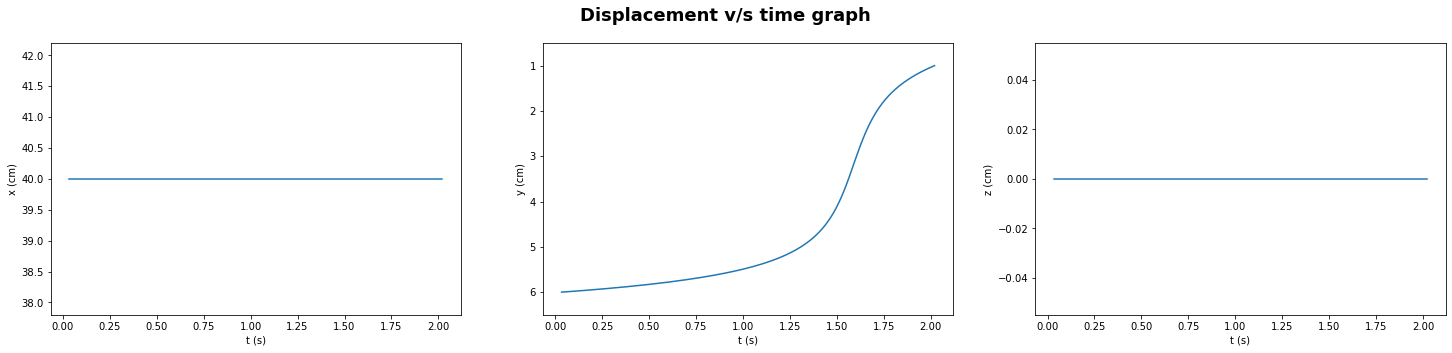

In [3]:
p = (Y/v)/len(Y)
t = [p[0]]
for i in range(1, len(p)):
    pp = p[i]+t[i-1]
    t.append(pp)

plt.figure(figsize=(25,5))

plt.subplot(1,3,1)
plt.plot(t, [x for i in range(len(t))])
plt.xlabel("t (s)")
plt.ylabel("x (cm)")

plt.subplot(1,3,2)
plt.plot(t, Y)
plt.ylim(6.5,0.5)
plt.xlabel("t (s)")
plt.ylabel("y (cm)")

plt.subplot(1,3,3)
plt.plot(t, [-(h-z) for i in range(len(t))])
plt.xlabel("t (s)")
plt.ylabel("z (cm)")

plt.suptitle("Displacement v/s time graph", fontweight="bold", fontsize=18)
plt.show()

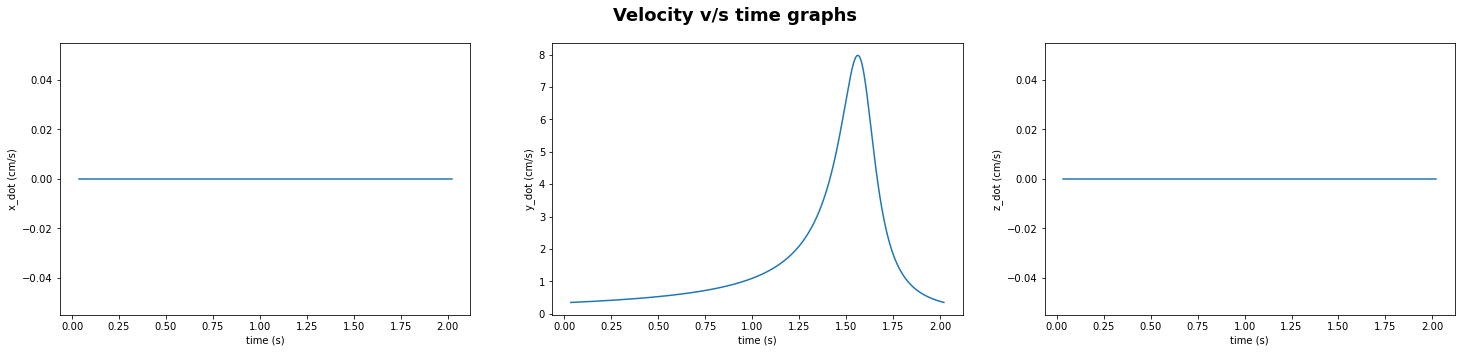

In [4]:
plt.figure(figsize=(25,5))
plt.subplot(1,3,1)
plt.plot(t, [0 for i in range(len(t))])
plt.xlabel("time (s)")
plt.ylabel("x_dot (cm/s)")

plt.subplot(1,3,2)
plt.plot(t, v)
plt.xlabel("time (s)")
plt.ylabel("y_dot (cm/s)")

plt.subplot(1,3,3)
plt.plot(t, [0 for i in range(len(t))])
plt.xlabel("time (s)")
plt.ylabel("z_dot (cm/s)")

plt.suptitle("Velocity v/s time graphs", fontweight="bold", fontsize=18)
plt.show()

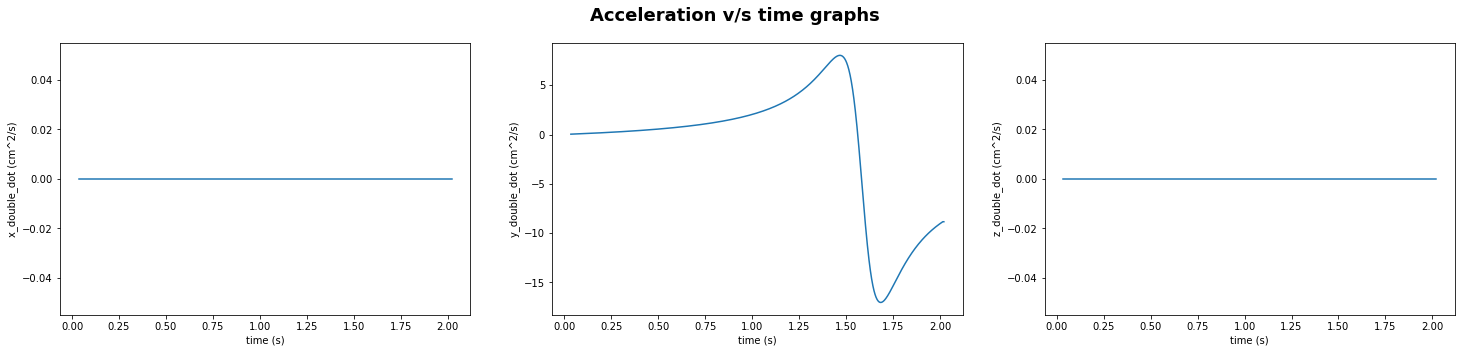

In [5]:
a = []
for i in range(len(t)-1):
    slope, intercept = np.polyfit(np.log([t[i], t[i+1]]),
                                  np.log([v[i], v[i+1]]), 1)
    a.append(slope)
a.append(slope)

plt.figure(figsize=(25,5))
plt.subplot(1,3,1)
plt.plot(t, [0 for i in range(len(t))])
plt.xlabel("time (s)")
plt.ylabel("x_double_dot (cm^2/s)")

plt.subplot(1,3,2)
plt.plot(t, a)
plt.xlabel("time (s)")
plt.ylabel("y_double_dot (cm^2/s)")

plt.subplot(1,3,3)
plt.plot(t, [0 for i in range(len(t))])
plt.xlabel("time (s)")
plt.ylabel("z_double_dot (cm^2/s)")

plt.suptitle("Acceleration v/s time graphs", fontweight="bold", fontsize=18)
plt.show()

# Task 2

In [6]:
y = sympy.symbols('y')

q1 = []
q2 = []
w1 = []
w2 = []
alpha1 = []
alpha2 = []

for i in Y:
    q_2 = sympy.acos((x**2 + y**2 - l1**2 - l2**2)/(2*l1*l2))
    f = sympy.lambdify(y, q_2)
    q2.append(f(i))
    
    q_1 = sympy.atan(y/x) - sympy.atan((l2*sympy.sin(q_2))/(l1 + l2*sympy.cos(q_2)))
    f = sympy.lambdify(y, q_1)
    q1.append(f(i))
    
    w_2 = sympy.Derivative(q_2, y).doit()
    f = sympy.lambdify(y, w_2)
    w2.append(f(i))
    
    w_1 = sympy.Derivative(q_1, y).doit()
    f = sympy.lambdify(y, w_1)
    w1.append(f(i))
    
    a_2 = sympy.Derivative(w_2, y).doit()
    f = sympy.lambdify(y, a_2)
    alpha2.append(f(i))
    
    a_1 = sympy.Derivative(w_1, y).doit()
    f = sympy.lambdify(y, a_1)   
    alpha1.append(f(i))

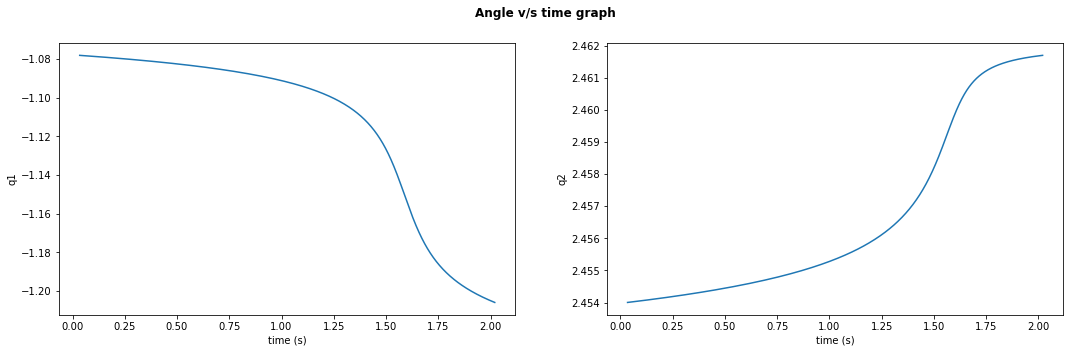

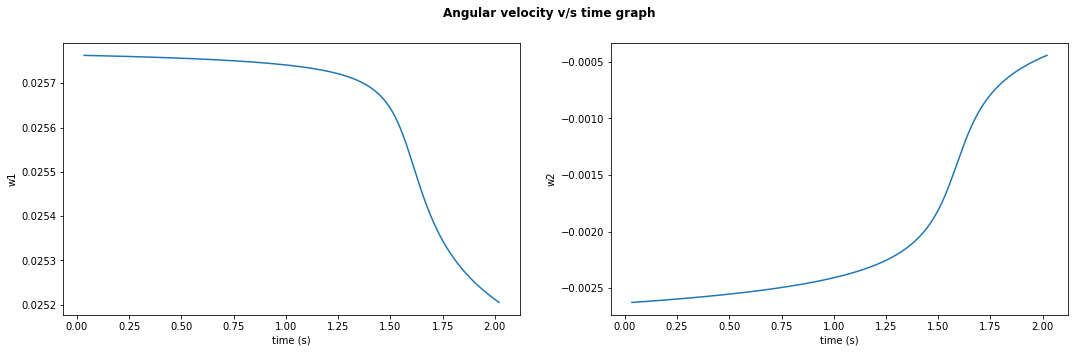

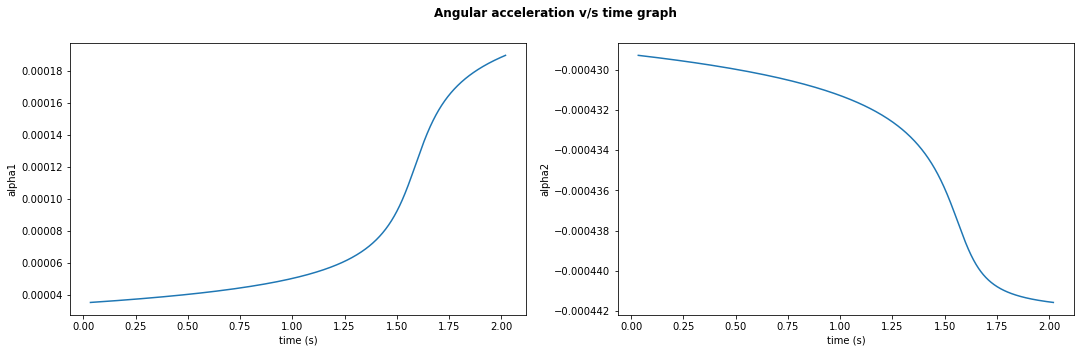

In [7]:
plt.figure(figsize=(18,5))
plt.subplot(1,2,1)
plt.plot(t, q1)
plt.xlabel("time (s)")
plt.ylabel("q1")
plt.subplot(1,2,2)
plt.plot(t, q2)
plt.xlabel("time (s)")
plt.ylabel("q2")
plt.suptitle("Angle v/s time graph", fontweight="bold")
plt.show()

plt.figure(figsize=(18,5))
plt.subplot(1,2,1)
plt.plot(t, w1)
plt.xlabel("time (s)")
plt.ylabel("w1")
plt.subplot(1,2,2)
plt.plot(t, w2)
plt.xlabel("time (s)")
plt.ylabel("w2")
plt.suptitle("Angular velocity v/s time graph", fontweight="bold")
plt.show()

plt.figure(figsize=(18,5))
plt.subplot(1,2,1)
plt.plot(t, alpha1)
plt.xlabel("time (s)")
plt.ylabel("alpha1")
plt.subplot(1,2,2)
plt.plot(t, alpha2)
plt.xlabel("time (s)")
plt.ylabel("alpha2")
plt.suptitle("Angular acceleration v/s time graph", fontweight="bold")
plt.show()

# Task 3

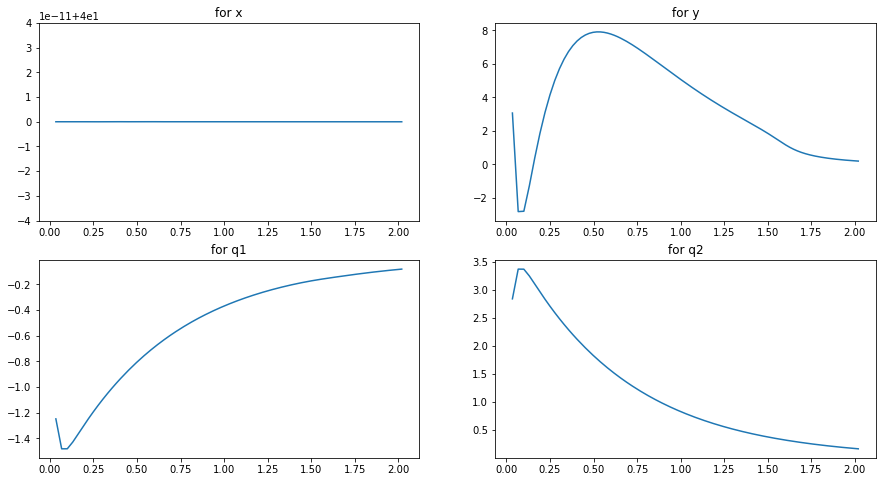

In [8]:
T = t
Q1 = q1
Q2 = q2
X = x
from sympy.integrals.transforms import inverse_laplace_transform
from sympy.abc import s, t
import control.matlab as control
from sympy import lambdify

K = 0.7
Kp = 1
Jeff = 0.01064
Beff = 0.44
KD = 0.03

G = control.tf([K*Kp], [Jeff, (Beff + K*KD), K*Kp])

theta_m = inverse_laplace_transform((K*Kp)/(Jeff*s**2 + (Beff+K*KD)*s + K*Kp), s, t)

q1_m = []
q2_m = []
xx = []
yy = []
for i in range(len(q1)):
    pp = sympy.simplify(theta_m/sympy.Heaviside(t))
    f1 = lambdify(t, pp)
    p = f1(T[i])
    q1_m.append(p*q1[i])
    q2_m.append(p*q2[i])
    
    xx.append(l1*math.cos((q1[i])) + l2*math.cos((q1[i] + q2[i])))
    yy.append(l1*math.sin((p*q1[i])) + l2*math.sin((p*q1[i] + p*q2[i])))
    
plt.figure(figsize=(15,8))
plt.subplot(2,2,1)
plt.plot(T, xx)
plt.title('for x')
plt.subplot(2,2,2)
plt.plot(T, yy)
plt.title('for y')
plt.subplot(2,2,3)
plt.plot(T, q1_m)
plt.title('for q1')
plt.subplot(2,2,4)
plt.plot(T, q2_m)
plt.title('for q2')
# plt.suptitle('Errors')
plt.show()

# Task 4

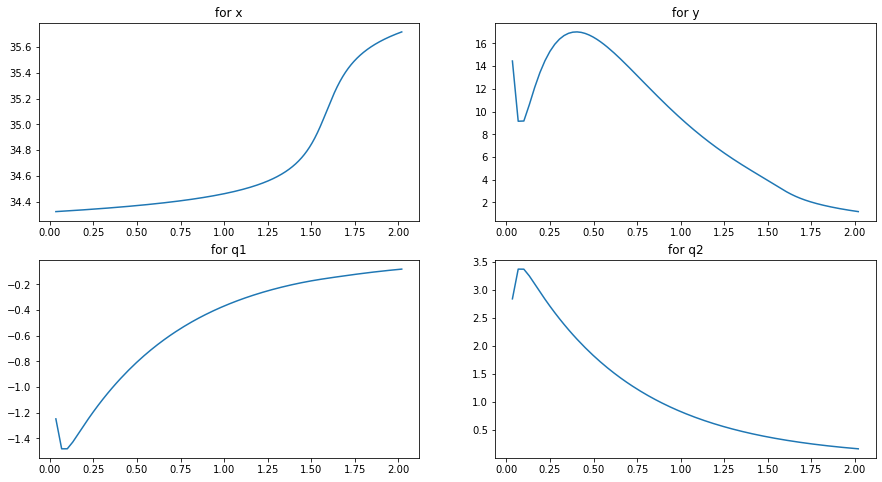

In [9]:
l1 = 60*0.8
K = 0.7
Kp = 1
Jeff = 0.01064
Beff = 0.44
KD = 0.03

G = control.tf([K*Kp], [Jeff, (Beff + K*KD), K*Kp])

theta_m = inverse_laplace_transform((K*Kp)/(Jeff*s**2 + (Beff+K*KD)*s + K*Kp), s, t)

q1_m = []
q2_m = []
xx = []
yy = []
for i in range(len(q1)):
    pp = sympy.simplify(theta_m/sympy.Heaviside(t))
    f1 = lambdify(t, pp)
    p = f1(T[i])
    q1_m.append(p*q1[i])
    q2_m.append(p*q2[i])
    
    xx.append(l1*math.cos((q1[i])) + l2*math.cos((q1[i] + q2[i])))
    yy.append(l1*math.sin((p*q1[i])) + l2*math.sin((p*q1[i] + p*q2[i])))
plt.figure(figsize=(15,8))
plt.subplot(2,2,1)
plt.plot(T, xx)
plt.title('for x')
plt.subplot(2,2,2)
plt.plot(T, yy)
plt.title('for y')
plt.subplot(2,2,3)
plt.plot(T, q1_m)
plt.title('for q1')
plt.subplot(2,2,4)
plt.plot(T, q2_m)
plt.title('for q2')
# plt.suptitle('Errors')
plt.show()

# Task 5

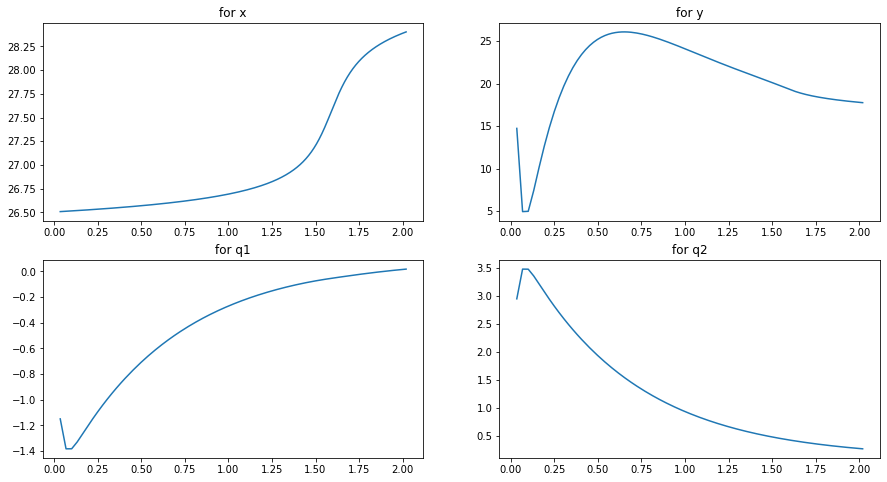

In [10]:
K = 0.7
Kp = 1
Jeff = 0.01064
Beff = 0.44
KD = 0.03

G = control.tf([K*Kp], [Jeff, (Beff + K*KD), K*Kp])

theta_m = inverse_laplace_transform((K*Kp)/(Jeff*s**2 + (Beff+K*KD)*s + K*Kp), s, t)

q1_m = []
q2_m = []
xx = []
yy = []
for i in range(len(q1)):
    pp = sympy.simplify(theta_m/sympy.Heaviside(t))
    f1 = lambdify(t, pp)
    p = f1(T[i])
    q1_m.append(p*q1[i]+0.1)
    q2_m.append(p*q2[i]+0.1)
    
    xx.append(l1*math.cos((q1[i]+0.1)) + l2*math.cos((q1[i] + q2[i]+0.2)))
    yy.append(l1*math.sin((p*q1[i]+0.1)) + l2*math.sin((p*q1[i] + p*q2[i]+0.2)))
plt.figure(figsize=(15,8))
plt.subplot(2,2,1)
plt.plot(T, xx)
plt.title('for x')
plt.subplot(2,2,2)
plt.plot(T, yy)
plt.title('for y')
plt.subplot(2,2,3)
plt.plot(T, q1_m)
plt.title('for q1')
plt.subplot(2,2,4)
plt.plot(T, q2_m)
plt.title('for q2')
# plt.suptitle('Errors')
plt.show()

# Task 6

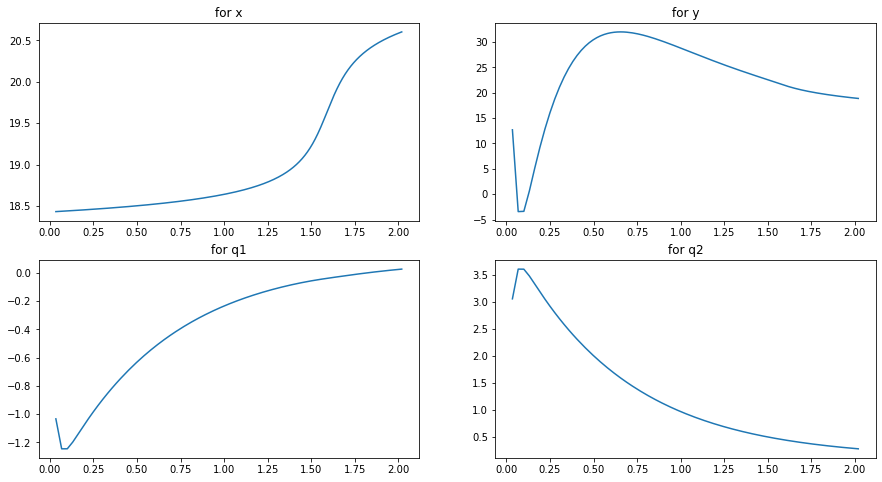

In [11]:
K = 0.7
Kp = 1
Jeff = 0.01064
Beff = 0.44
KD = 0.03

G = control.tf([K*Kp], [Jeff, (Beff + K*KD), K*Kp])

theta_m = inverse_laplace_transform((K*Kp)/(Jeff*s**2 + (Beff+K*KD)*s + K*Kp), s, t)

q1_m = []
q2_m = []
xx = []
yy = []
for i in range(len(q1)):
    pp = sympy.simplify(theta_m/sympy.Heaviside(t))
    f1 = lambdify(t, pp)
    p = f1(T[i])
    q1_m.append(p*(q1[i]+0.1)+0.1)
    q2_m.append(p*(q2[i]+0.1)+0.1)
    
    xx.append(l1*math.cos(((q1[i]+0.1)+0.1)) + l2*math.cos(((q1[i]+0.1)+0.1 + (q2[i]+0.1)+0.1)))
    yy.append(l1*math.sin((p*(q1[i]+0.1)+0.1)) + l2*math.sin((p*(q1[i]+0.1)+0.1 + p*(q2[i]+0.1)+0.1)))
plt.figure(figsize=(15,8))
plt.subplot(2,2,1)
plt.plot(T, xx)
plt.title('for x')
plt.subplot(2,2,2)
plt.plot(T, yy)
plt.title('for y')
plt.subplot(2,2,3)
plt.plot(T, q1_m)
plt.title('for q1')
plt.subplot(2,2,4)
plt.plot(T, q2_m)
plt.title('for q2')
# plt.suptitle('Errors')
plt.show()